In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def train_cifar10():
    # load the training and testing data, scale it into the range [0, 1],
    # then reshape the design matrix
    # each image is: 32 x 32 x 3
    print("[INFO] loading CIFAR-10 data...")
    ((trainX, trainY), (testX, testY)) = cifar10.load_data()
    trainX = trainX.astype("float") / 255.0
    testX = testX.astype("float") / 255.0
    trainX = trainX.reshape((trainX.shape[0], 3072))
    testX = testX.reshape((testX.shape[0], 3072))

    # convert the labels from integers to vectors
    lb = LabelBinarizer()
    trainY = lb.fit_transform(trainY)
    testY = lb.transform(testY)

    # initialize the label names for the CIFAR-10 dataset
    labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

    # define the 3072-1024-512-10 architecture using Keras
    model = Sequential()
    model.add(Dense(1024, input_shape=(3072,), activation="relu"))
    model.add(Dense(512, activation="relu"))
    model.add(Dense(10, activation="softmax"))

    # train the model usign SGD
    print("[INFO] training network...")
    sgd = SGD(0.01)
    model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
    H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

    # evaluate the network
    print("[INFO] evaluating network...")
    predictions = model.predict(testX, batch_size=32)
    print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_accuracy")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

[INFO] loading CIFAR-10 data...
[INFO] training network...
Epoch 1/100
1563/1563 [==============================] - 28s 18ms/step - loss: 1.9523 - accuracy: 0.2971 - val_loss: 1.7138 - val_accuracy: 0.3754
Epoch 2/100
1563/1563 [==============================] - 29s 19ms/step - loss: 1.6718 - accuracy: 0.4082 - val_loss: 1.6354 - val_accuracy: 0.4112
Epoch 3/100
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5727 - accuracy: 0.4429 - val_loss: 1.5281 - val_accuracy: 0.4574
Epoch 4/100
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5159 - accuracy: 0.4650 - val_loss: 1.5927 - val_accuracy: 0.4364
Epoch 5/100
1563/1563 [==============================] - 29s 19ms/step - loss: 1.4714 - accuracy: 0.4778 - val_loss: 1.5539 - val_accuracy: 0.4405
Epoch 6/100
1563/1563 [==============================] - 30s 19ms/step - loss: 1.4217 - accuracy: 0.4932 - val_loss: 1.4606 - val_accuracy: 0.4710
Epoch 7/100
1563/1563 [==============================] - 30

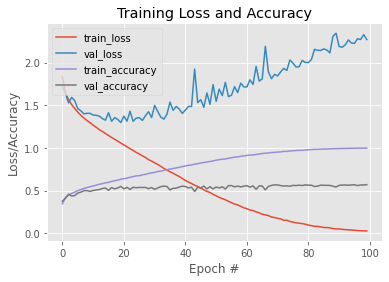

In [5]:
train_cifar10()